# Telco Churn Report
## By: Joann Balraj
#### November 29, 2021
----------

## Project Goals:
- Find drivers for customer churn at Telco. Why are customers churning?
- Build a Machine Learning classification model that outperforms the baseline model to accuractely predict customer churn.
- Document my process so that it can be presented to a non-data scientist, as well as read later like a report.

### Project Description:
At Telco, there is a big problem. Too many people are churning, and my goal is to find out why and present my take on how to reduce it. We will analyze the data and go through why people seem to be churning based on patterns in the data. We will also produce models to represent churn in relation to the drivers, specifically payment method and monthly charges. In the end we will look at reccomendations on how we can lower the customer churn rate in the future.

## Questions:
- Do customers who auto pay churn at different rates than customers who manual pay?
- Do customers who churn have a higher monthly bill on average than customers who do not churn

#### What drives customer churn at Telco?
### Key Findings:
- 27% of all customers churn
- Two drivers of churn discovered:
  - Customers who pay their bill with auto pay churn at lower rates
  - Customers who churn have higher monthly charges
- Baseline accuracy model for predicting churn has an accuracy of 74%
- The Random Forest Classifier model at the end of this report achieves an 80% accuracy rate on out of sample data


### Data Dictionary:
| Target| Description | Data Type |
|---------|-------------|-----------|
| churn | Indicates if a customer has churned or if they are still a Telco customer, 0 = not churned, 1 = has churned | int64 |

| Categorical Features | Description | Data Type |
|---------|-------------|-----------|
|senior_citizen| indicates if the customer is a senior citizen | int64 |
dependents | indicates if the customer has dependents | int64
phone_service | indicates if the customer has phone service with Telco | int64 |
multiple_lines | indicates if the customer with phone service has multiple lines | int64 |
online_security | indicates if the customer has online security services| int 64 |
online_backup | indicates if the customer has online backup services | int64 |
device_protection | indicates if the customer has device protection services | int64 |
tech_support | indicates if the customer has tech support services | int64 |
streaming_tv | indicates if the customer has tv streaming services | int64 |
streaming_movies | indicates if the customer has movie streaming services | int64 |
paperless_billing | indicates if the customer in enrolled in paperless billing | int64 |
internet_service_type_id | indicates which internet service (if any) the customer has | int64
gender_Male | indicates the the customers' gender identity | uint8
contract_type_id | indicates the type of contract the customer has with Telco | int64|
auto_bill_pay | indicates if the customer is enrolled in auto bill pay or not | int64|

| Continuous Features | Description | Data Type |
|---------|-------------|-----------|
| tenure | Indicates how many months the customer has been with Telco | int64 |
| monthly_charges | Indicates the customer's monthly bill | float64 |
| total_charges | Indicates the total amount the customer has been charged during their tenure | float64

## Wrangle Telco Data
To acquire the titanic data, I used the telco data csv file using the acquire module from the `env.py` file.

### Data Aquisition
Import tools and modules necessary for analysis. The acquire.py, prepare.py, and explore.py modules are included in the parent repo for this project.

In [9]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#standard imports
import numpy as np
import pandas as pd
import os

#stats tools
from math import sqrt
from scipy import stats
from scipy.stats import ttest_ind_from_stats

#visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#env & modules
from env import host, user, password
import acquire
import prepare
import explore

### Acquire the data

In [10]:
#Utilize the acquire module
telco = acquire.get_telco_data()

#### Initial data exploration

In [3]:
telco.shape
print(f'The telco dataframe has {telco.shape[1]} columns and {telco.shape[0]} rows')

The telco dataframe has 24 columns and 7043 rows


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
#Review summary stats for numeric columns
telco.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
#How many unique values are in each column? 
for col in telco:
    print(f'{col} has {telco[col].nunique()} unique values.')

payment_type_id has 4 unique values.
contract_type_id has 3 unique values.
internet_service_type_id has 3 unique values.
customer_id has 7043 unique values.
gender has 2 unique values.
senior_citizen has 2 unique values.
partner has 2 unique values.
dependents has 2 unique values.
tenure has 73 unique values.
phone_service has 2 unique values.
multiple_lines has 3 unique values.
online_security has 3 unique values.
online_backup has 3 unique values.
device_protection has 3 unique values.
tech_support has 3 unique values.
streaming_tv has 3 unique values.
streaming_movies has 3 unique values.
paperless_billing has 2 unique values.
monthly_charges has 1585 unique values.
total_charges has 6531 unique values.
churn has 2 unique values.
internet_service_type has 3 unique values.
contract_type has 3 unique values.
payment_type has 4 unique values.


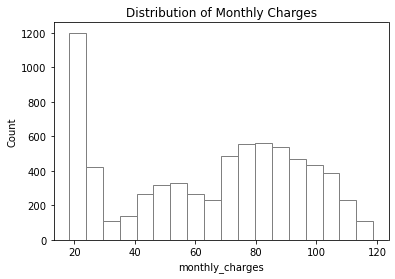

In [12]:
#Visualize factor - monthly charges
sns.histplot(data=telco.monthly_charges, color='white', edgecolor='grey')
plt.title('Distribution of Monthly Charges')
plt.show()

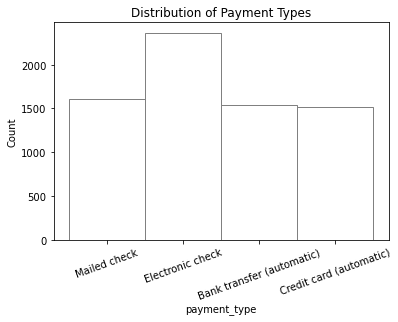

In [13]:
#Visualize another factor - payment types
sns.histplot(data=telco.payment_type, color='white', edgecolor='grey')
plt.title('Distribution of Payment Types')
plt.xticks(rotation=20)
plt.show()

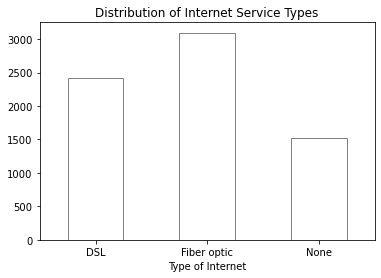

In [14]:
#Plot Internet Service Type as an example of a factor 
telco.internet_service_type.value_counts().sort_index().plot.bar(color=(0.0, 0.0, 0.0, 0.0), edgecolor='grey')
plt.title("Distribution of Internet Service Types")
plt.xlabel('Type of Internet')
plt.xticks(rotation=0)
plt.show()

### Acquire Takeaways
- Appears there are no null values
  - However, there were empty strings in the `total_charges` column that had to be dealt with
- Column that needs to be cleaned and prepared:
  - `total_charges`  - Need to convert from object to float
- Prep Question:
  - Some columns have more unique values than expected. Why?
    - online_security
    - online_backup
    - device_protection
    - tech_support
    - streaming_tv
    - streaming_movies

### Data Preparation
The prepare.py module prepares the telco dataframe for analysis by:

- Updating the values in the dataframe that are strings reading "No internet service" and "No phone service" and converting these to 0.
- Renaming the 'payment_type_id' column to "auto_bill_pay" and grouping payment id types into two subgroups:
    - Auto Bill Pay = 1
    - Manual Bill Pay = 0
- Encoding gender 
- Dropping columns with duplicate values
- Dealing with empty strings from the `total_charges` column. These strings are empty when the customer is in their first month of tenure and thus their `total_charges` are currently empty. To deal with this, I have filled those empty values with the corresponding monthly charge amount.

In [15]:
#Clean the df by applying the prep_data function from prepare.py
telco = prepare.prep_data(telco)

In [16]:
#Review the info for the prepared dataframe:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0030-FNXPP to 9995-HOTOH
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   auto_bill_pay             7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   int64  
 5   dependents                7043 non-null   int64  
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   int64  
 8   multiple_lines            7043 non-null   int64  
 9   online_security           7043 non-null   int64  
 10  online_backup             7043 non-null   int64  
 11  device_protection         7043 non-null   int64  
 12  tech_support              7043 non-null   int64  
 13  streaming_tv              7043 non-null   int64  
 14

In [17]:
 #Define the categorical and quantitative variables:
cat_vars = ['churn', 'senior_citizen', 'partner', 'dependents', 'phone_service', 
            'multiple_lines','online_security', 'online_backup', 'device_protection', 
            'tech_support', 'streaming_tv','streaming_movies', 'paperless_billing',
       'internet_service_type_id','gender_Male', 'contract_type_id' , 'auto_bill_pay']
quant_vars = ['tenure', 'monthly_charges', 'total_charges']

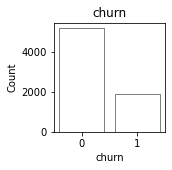

   churn  Count  Percent
0      0   5174    73.46
1      1   1869    26.54
_________________________________________________________________


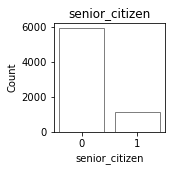

   senior_citizen  Count  Percent
0               0   5901    83.79
1               1   1142    16.21
_________________________________________________________________


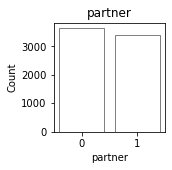

   partner  Count  Percent
0        0   3641     51.7
1        1   3402     48.3
_________________________________________________________________


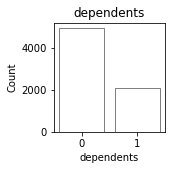

   dependents  Count  Percent
0           0   4933    70.04
1           1   2110    29.96
_________________________________________________________________


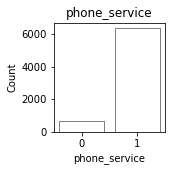

   phone_service  Count  Percent
1              1   6361    90.32
0              0    682     9.68
_________________________________________________________________


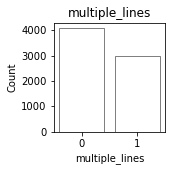

   multiple_lines  Count  Percent
0               0   4072    57.82
1               1   2971    42.18
_________________________________________________________________


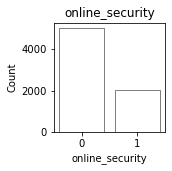

   online_security  Count  Percent
0                0   5024    71.33
1                1   2019    28.67
_________________________________________________________________


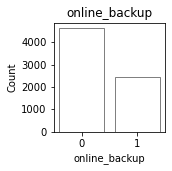

   online_backup  Count  Percent
0              0   4614    65.51
1              1   2429    34.49
_________________________________________________________________


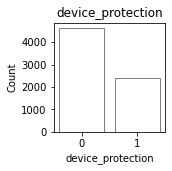

   device_protection  Count  Percent
0                  0   4621    65.61
1                  1   2422    34.39
_________________________________________________________________


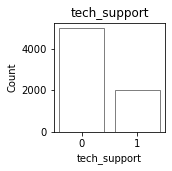

   tech_support  Count  Percent
0             0   4999    70.98
1             1   2044    29.02
_________________________________________________________________


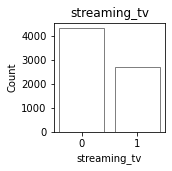

   streaming_tv  Count  Percent
0             0   4336    61.56
1             1   2707    38.44
_________________________________________________________________


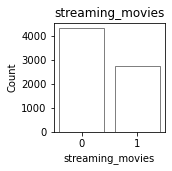

   streaming_movies  Count  Percent
0                 0   4311    61.21
1                 1   2732    38.79
_________________________________________________________________


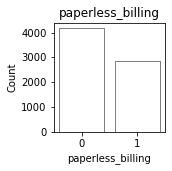

   paperless_billing  Count  Percent
1                  0   4171    59.22
0                  1   2872    40.78
_________________________________________________________________


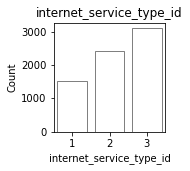

   internet_service_type_id  Count  Percent
2                         3   3096    43.96
1                         2   2421    34.37
3                         1   1526    21.67
_________________________________________________________________


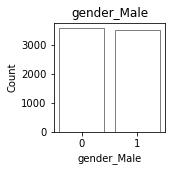

   gender_Male  Count  Percent
1            0   3555    50.48
0            1   3488    49.52
_________________________________________________________________


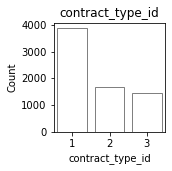

   contract_type_id  Count  Percent
1                 1   3875    55.02
3                 2   1695    24.07
2                 3   1473    20.91
_________________________________________________________________


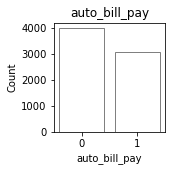

   auto_bill_pay  Count  Percent
0              0   3977    56.47
1              1   3066    43.53
_________________________________________________________________


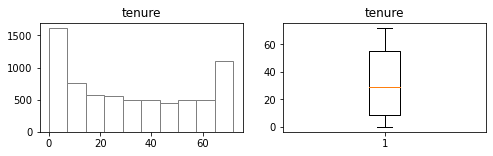

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


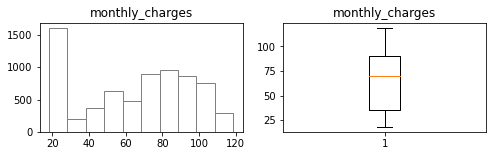

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


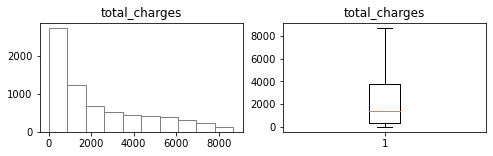

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64


In [18]:
#Visualize the univariate variables with the help of the explore module
explore.explore_univariate(telco, cat_vars, quant_vars)

### Takeaways:
- With more time, I would explore the different ways of dealing with the "No Internet / No Phone Service" impacts the analysis.
- Extra services such as online protection, streaming services, device protection, etc. are generally under-utilized by customers, with a majority of customers not having these services.

## Data Exploration
#### Baseline Accuracy
- The first step of the exploration process was to establish the baseline prediction and baseline accuracy using the entire data set.
- The baseline prediction will be "no churn" since that is the more recurring class for churn.

In [ ]:
#Create a column for the baseline prediction and set it to 0 == No Churn 
telco['baseline_prediction'] = 0

#Calcualte the baseline_accuracy for evaluating future models
baseline_accuracy = (telco.baseline_prediction == telco.churn).mean()

print(f'Baseline accuracy: {baseline_accuracy:.2%}')

#### Train, Validate, Test Split
- The next step is to split the data into 3 different dataframes using the function from explore.py
- The dataframes are stratfied except the target variable, churn
- All further exploration will be done on the train dataframe only

In [20]:
train, validate, test = explore.train_validate_test_split(telco, target='churn', seed=123)
print(f'The telco train dataframe has {train.shape[0]} rows and {train.shape[1]} columns.')

The telco train dataframe has 3943 rows and 21 columns.


## Hypothesis Testing
### Test 1: Chi Squared Test
#### Do customers who auto pay churn at different rates than customers who manual pay?

- H$o$: There is a relationship (correlation) between payment method and whether a customer will churn or not.

- H$a$: There is no relationship (correlation) between payment method and whether a customer will churn or not.

In [24]:
#Set confidence interval and alpha for chi^2 test
confidence_int = .95
a = 1 - confidence_int

#Setup crosstab
observed = pd.crosstab(train['churn'], train['auto_bill_pay'] )

#Run Chi test
chi2, p, degf, expected = stats.chi2_contingency(observed)

#Evaluate against the null hypothesis
if p < a:
    print("Reject the null hypothesis")
    print("Move forward with the understanding that payment method is a feature for indicating churn.")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
Move forward with the understanding that payment method is a feature for indicating churn.


### Bill Pay Feature Visualization
#### The rate of churn based on bill pay method:

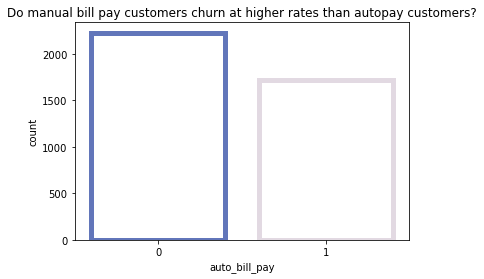

In [25]:
ax = sns.countplot(x="auto_bill_pay", data=train,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("twilight_shifted", 3))

plt.title("Do manual bill pay customers churn at higher rates than autopay customers?")
plt.show()

### Test 2: Two-sample, two-tailed T-test
#### Do customers who churn have a higher monthly bill on average than customers who do not churn?
- H$o$: Monthly bill has no impact on customer churn.
- H$a$: Customers with higher monthly bills churn more.

In [23]:
#Set confidence interval and alpha for t-test
confidence_int = .95
a = 1 - confidence_int

x1 = train[train.churn == 0].monthly_charges
x2 = train[train.churn == 1].monthly_charges

#Run t-test
stats.ttest_ind(x1, x2)

#Evaluate against the null hypothesis
if p < a:
    print("Reject the null hypothesis")
    print("Move forward with the understanding that higher monthly charges is a feature impacting churn.")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
Move forward with the understanding that higher monthly charges is a feature impacting churn.


### Monthly Charges Feature Visualization
#### The rate of churn based on monthly-charges over time of tenure:

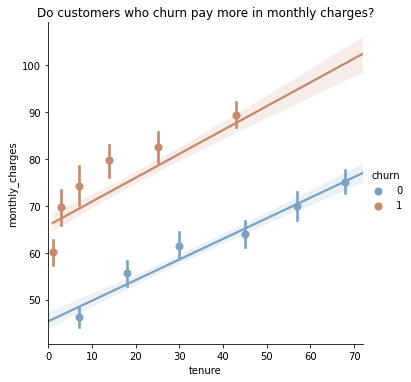

In [26]:
#Visualize the relatinship between monthly charges and churn at stages of customer tenure
sns.lmplot(data=train, x='tenure', y='monthly_charges', hue = 'churn', x_bins=6, x_estimator=np.mean, palette="twilight_shifted")
plt.title("Do customers who churn pay more in monthly charges?")
plt.show()

### Hypothesis Testing Takeaways:
- Payment type and monthly charges are likely features driving churn
- Customers who churn pay more in monthly charges at all stages of tenure

## Bivariate Exploration

senior_citizen 
_____________________

         chi2       p-value  degrees of freedom
0  111.111588  5.593212e-26                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2519   760  3279
1                378   286   664
All             2897  1046  3943

expected:
              0           1
0  2409.146082  869.853918
1   487.853918  176.146082


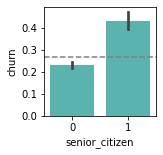


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  80.757472  2.551912e-19                   1

observed:
 churn       0     1   All
partner                  
0        1379   668  2047
1        1518   378  1896
All      2897  1046  3943

expected:
              0           1
0  1503.971342  543.028658
1  1393.028658  502.971342


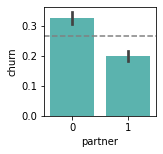


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  113.542825  1.640986e-26                   1

observed:
 churn          0     1   All
dependents                  
0           1925   878  2803
1            972   168  1140
All         2897  1046  3943

expected:
              0           1
0  2059.419478  743.580522
1   837.580522  302.419478


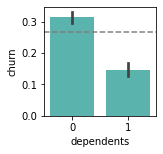


_____________________

phone_service 
_____________________

       chi2  p-value  degrees of freedom
0  2.261794   0.1326                   1

observed:
 churn             0     1   All
phone_service                  
0               289    87   376
1              2608   959  3567
All            2897  1046  3943

expected:
              0           1
0   276.254628   99.745372
1  2620.745372  946.254628


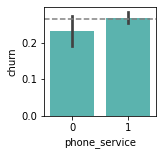


_____________________

multiple_lines 
_____________________

        chi2   p-value  degrees of freedom
0  12.907454  0.000327                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1719   553  2272
1               1178   493  1671
All             2897  1046  3943

expected:
              0           1
0  1669.283287  602.716713
1  1227.716713  443.283287


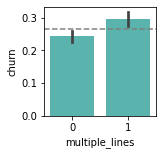


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  110.365313  8.149875e-26                   1

observed:
 churn               0     1   All
online_security                  
0                1900   868  2768
1                 997   178  1175
All              2897  1046  3943

expected:
              0           1
0  2033.704286  734.295714
1   863.295714  311.704286


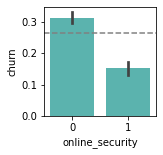


_____________________

online_backup 
_____________________

        chi2       p-value  degrees of freedom
0  25.943779  3.515064e-07                   1

observed:
 churn             0     1   All
online_backup                  
0              1813   747  2560
1              1084   299  1383
All            2897  1046  3943

expected:
              0           1
0  1880.882577  679.117423
1  1016.117423  366.882577


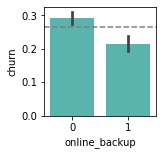


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  23.374266  0.000001                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1847   754  2601
1                  1050   292  1342
All                2897  1046  3943

expected:
              0           1
0  1911.006087  689.993913
1   985.993913  356.006087


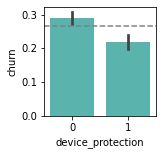


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  105.401197  9.974962e-25                   1

observed:
 churn            0     1   All
tech_support                  
0             1913   868  2781
1              984   178  1162
All           2897  1046  3943

expected:
              0           1
0  2043.255643  737.744357
1   853.744357  308.255643


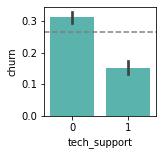


_____________________

streaming_tv 
_____________________

        chi2  p-value  degrees of freedom
0  17.447168  0.00003                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1848   590  2438
1             1049   456  1505
All           2897  1046  3943

expected:
              0           1
0  1791.246766  646.753234
1  1105.753234  399.246766


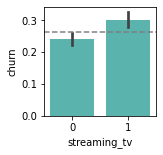


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  11.974906  0.000539                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1807   588  2395
1                 1090   458  1548
All               2897  1046  3943

expected:
              0           1
0  1759.653817  635.346183
1  1137.346183  410.653817


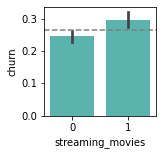


_____________________

paperless_billing 
_____________________

        chi2       p-value  degrees of freedom
0  152.19868  5.733280e-35                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1350   258  1608
1                  1547   788  2335
All                2897  1046  3943

expected:
              0           1
0  1181.429369  426.570631
1  1715.570631  619.429369


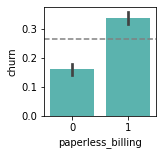


_____________________

internet_service_type_id 
_____________________

         chi2       p-value  degrees of freedom
0  408.384137  2.091758e-89                   2

observed:
 churn                        0     1   All
internet_service_type_id                  
1                         1094   239  1333
2                         1039   742  1781
3                          764    65   829
All                       2897  1046  3943

expected:
              0           1
0   979.381435  353.618565
1  1308.535886  472.464114
2   609.082678  219.917322


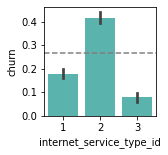


_____________________

gender_Male 
_____________________

       chi2   p-value  degrees of freedom
0  0.029156  0.864419                   1

observed:
 churn           0     1   All
gender_Male                  
0            1410   513  1923
1            1487   533  2020
All          2897  1046  3943

expected:
              0           1
0  1412.866092  510.133908
1  1484.133908  535.866092


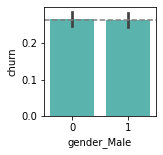


_____________________

contract_type_id 
_____________________

         chi2        p-value  degrees of freedom
0  625.295741  1.654837e-136                   2

observed:
 churn                0     1   All
contract_type_id                  
1                 1269   919  2188
2                  730   103   833
3                  898    24   922
All               2897  1046  3943

expected:
              0           1
0  1607.566827  580.433173
1   612.021557  220.978443
2   677.411616  244.588384


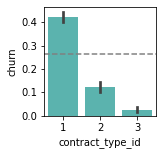


_____________________

auto_bill_pay 
_____________________

         chi2       p-value  degrees of freedom
0  174.812466  6.578994e-40                   1

observed:
 churn             0     1   All
auto_bill_pay                  
0              1454   773  2227
1              1443   273  1716
All            2897  1046  3943

expected:
              0           1
0  1636.220898  590.779102
1  1260.779102  455.220898


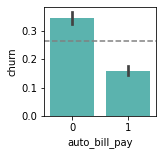


_____________________

tenure 
____________________



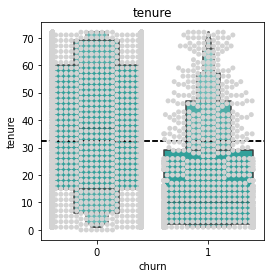

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.492924  24.017001  0.0  15.0  37.0  60.0  72.0
1      1046.0  18.184512  19.555280  1.0   2.0  10.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2232562.5, pvalue=1.612043074745637e-114)

____________________

monthly_charges 
____________________



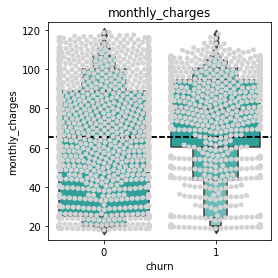

        count       mean        std    min     25%   50%    75%     max
churn                                                                  
0      2897.0  61.860476  30.988324  18.25  25.250  65.2  89.00  118.75
1      1046.0  75.072992  24.549408  18.95  60.625  79.9  94.25  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1145311.0, pvalue=1.0243400926956932e-31)

____________________

total_charges 
____________________



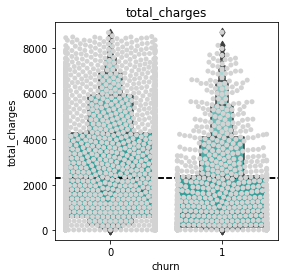

        count         mean          std   min       25%      50%       75%  \
churn                                                                        
0      2897.0  2572.723542  2330.703373  18.8  593.2000  1725.95  4265.000   
1      1046.0  1559.683270  1894.470785  19.1  141.4625   739.25  2362.025   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1962500.0, pvalue=1.2936573945760483e-45)

____________________



In [27]:
#Update categorical variables by removing target variable, churn
cat_vars = cat_vars[1:]

#Explore the bivariate variables
explore.explore_bivariate(train,'churn', cat_vars, quant_vars)

### Bivariate Exploration Takeaways:
- Rate of churn is fairly equal for customers with phone service vs. customers without phone service
- Customers without auxillary services churn at higher rates than customers with those services
- Explore the relationship between these services and consider developing new features
  - Streaming TV customers churn more which varies from other auxillary services
- Paperless billing customers churn at high rates
- Fiber customers churn at higher rates than the other internet services options

### Multivariate Exploration
**For multivariate exploration, I focused on the relation between the streaming services features and the quantitative features in exploration of churn.**

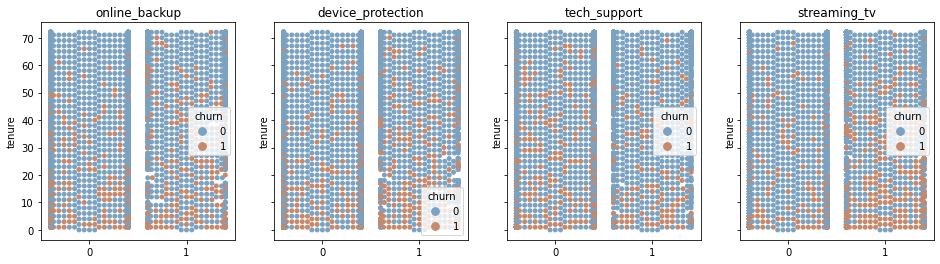

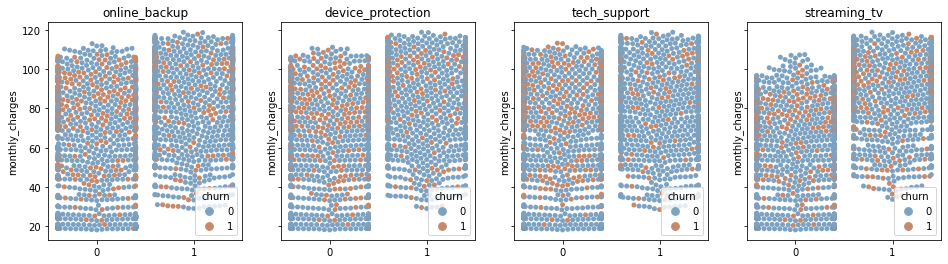

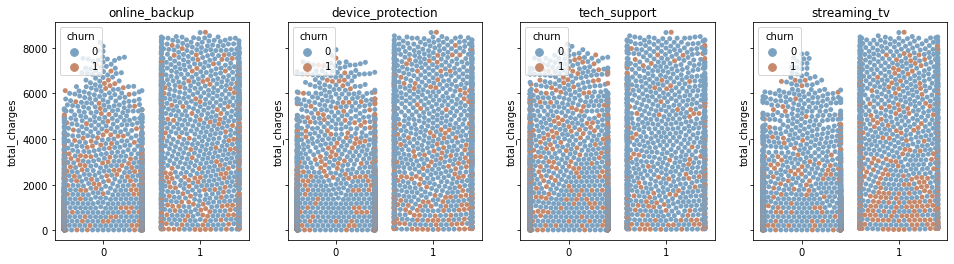

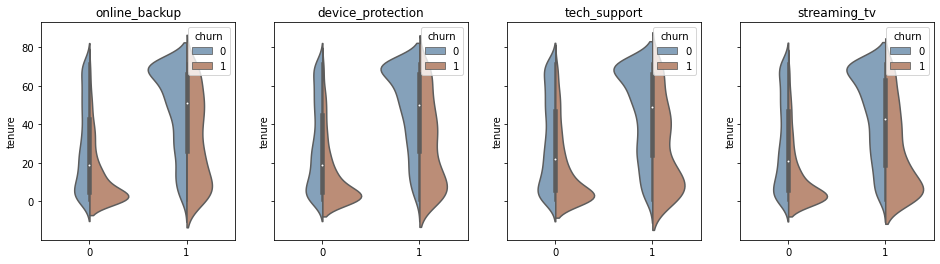

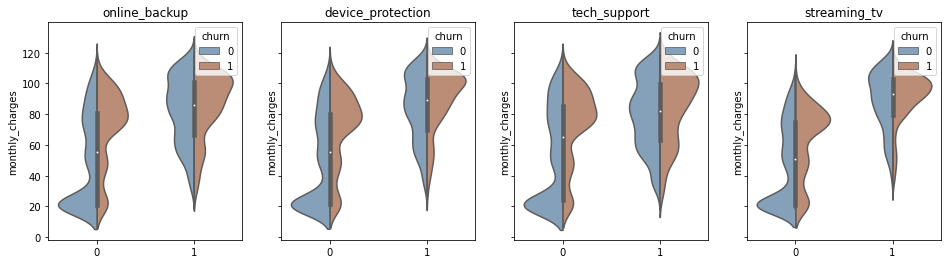

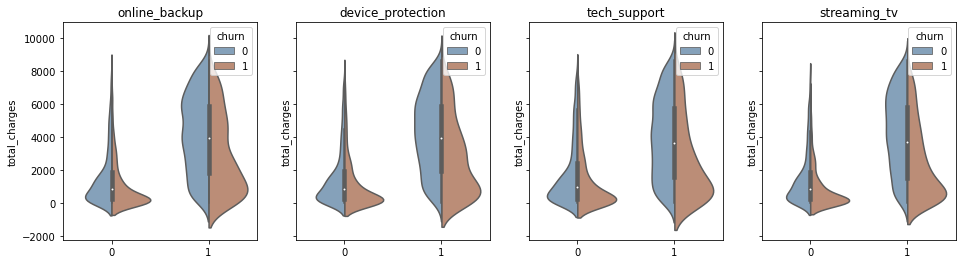

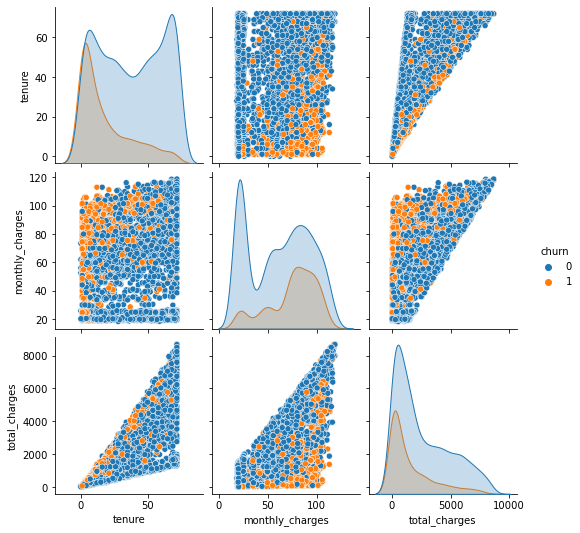

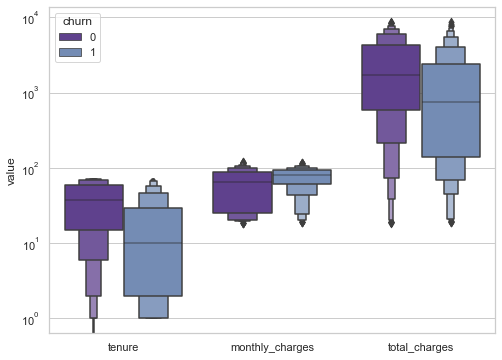

In [28]:
target = 'churn'

explore.explore_multivariate(train, target, cat_vars[6:10], quant_vars)

### Multivariate Exploration Takeaways:
- Customers with streaming tv services seem to churn at higher rates earlier in their tenure
  - Other services also appear to follow this trend but do not appear as prominent
- Honestly, there is a lot of information presented in these features to analyze. Due to the fact that these are auxillary services and in the interest of time, I am setting these features aside for this analsis and adding them to the list of features to explore more in the future.

### Modeling & Evaluation
#### Model 1: Logistic Regression

In [29]:
dropped_features = ['churn','baseline_prediction']

#Split train into X_train, y_train
X_train = train.drop(columns=dropped_features)
y_train = train.churn

#Split validate into X_validate, y_validate
X_validate = validate.drop(columns=dropped_features)
y_validate = validate.churn

#Split test into X_test, y_test
X_test = test.drop(columns=dropped_features)
y_test = test.churn

#Create the Object
logit = LogisticRegression(C=1, class_weight='balanced', random_state=123, intercept_scaling=1, solver='lbfgs')

#Fit the training data to the model
logit.fit(X_train, y_train)

#Make predictions
y_pred = logit.predict(X_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

Accuracy of Logistic Regression classifier on training set: 0.75
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2897
           1       0.52      0.79      0.62      1046

    accuracy                           0.75      3943
   macro avg       0.71      0.76      0.72      3943
weighted avg       0.80      0.75      0.76      3943



###### This model's accuracy is essentially the same as the baseline accuracy (73.46%). Therefore, this model is immediately rejected.


### Model 2: KNN with K = 5

In [30]:
features = ['contract_type_id', 'tenure', 'monthly_charges', 
                    'total_charges', 'internet_service_type_id']
dropped_features = ['churn','senior_citizen', 'partner', 'dependents', 'phone_service',
                    'multiple_lines', 'online_security', 'online_backup', 'device_protection',
                    'streaming_tv','streaming_movies','tech_support', 'paperless_billing',  
                    'baseline_prediction']

#Split train into X_train, y_train
X_train = train.drop(columns=dropped_features)
y_train = train.churn

#Split validate into X_validate, y_validate
X_validate = validate.drop(columns=dropped_features)
y_validate = validate.churn

#Split test into X_test, y_test
X_test = test.drop(columns=dropped_features)
y_test = test.churn

#Create the object
knn_2 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#Fit the training data to the model
knn_2.fit(X_train, y_train)

#Make Predictions
y_pred_2 = knn_2.predict(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_2.score(X_train, y_train)))

print(classification_report(y_train, y_pred_2))


Accuracy of KNN classifier on training set: 0.83
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2897
           1       0.72      0.56      0.63      1046

    accuracy                           0.83      3943
   macro avg       0.79      0.74      0.76      3943
weighted avg       0.82      0.83      0.82      3943



### Model 3: KNN with K = 2

In [31]:
#Create the object
knn_3 = KNeighborsClassifier(n_neighbors=2, weights='uniform')

#Fit the training data to the model
knn_3.fit(X_train, y_train)

#Make predictions
y_pred_3 = knn_3.predict(X_train)

#Report
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_3.score(X_train, y_train)))

print(classification_report(y_train, y_pred_3))

Accuracy of KNN classifier on training set: 0.86
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2897
           1       0.99      0.46      0.63      1046

    accuracy                           0.86      3943
   macro avg       0.91      0.73      0.77      3943
weighted avg       0.88      0.86      0.84      3943



### Model 4: Random Forest

In [32]:
#Create the object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

#Fit the data to the model
rf.fit(X_train, y_train)

#Make Predictions
y_pred_4 = rf.predict(X_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print(classification_report(y_train, y_pred_4))

Accuracy of random forest classifier on training set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      2897
           1       0.69      0.49      0.57      1046

    accuracy                           0.81      3943
   macro avg       0.76      0.71      0.72      3943
weighted avg       0.80      0.81      0.80      3943



#### Takeaways:
- Model 1 has the same accuracy as the baseline and it is rejected.
- Models 2, 3 & 4 performed the best on in-sample data.
- Next is to evaluate these models on the validate data frame

## Evaluate Models with Validate Dataframe

In [33]:
#Make predictions with Model 2
y_pred_2 = knn_2.predict(X_validate)

#Make predictions with Model 3
y_pred_3 = knn_3.predict(X_validate)

#Make predictions with Model 4
y_pred_4 = rf.predict(X_validate)

#Evaluate Model 2
print('Model 2 accuracy of KNN classifier with K=5 on validate set: {:.2f}'
     .format(knn_2.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred_2))
print('------------')

#Evaluate Model 3

print('Model 3 accuracy of KNN classifier with K=2 on validate set: {:.2f}'
     .format(knn_3.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred_3))  
print('------------')

#Evaluate Model 4

print('Model 4 accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))
print(classification_report(y_validate, y_pred_4))

Model 2 accuracy of KNN classifier with K=5 on validate set: 0.77
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1242
           1       0.59      0.46      0.52       449

    accuracy                           0.77      1691
   macro avg       0.71      0.67      0.69      1691
weighted avg       0.76      0.77      0.76      1691

------------
Model 3 accuracy of KNN classifier with K=2 on validate set: 0.76
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1242
           1       0.62      0.28      0.38       449

    accuracy                           0.76      1691
   macro avg       0.70      0.61      0.62      1691
weighted avg       0.74      0.76      0.73      1691

------------
Model 4 accuracy of random forest classifier on validate set: 0.79
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1242
           1

### Evaluate Model 4 (RF) with Test Dataframe

In [34]:
y_pred_4 = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred_4)}\n')

print('Accuracy of random forest classifier on test set: {:.2f}\n'
     .format(rf.score(X_test, y_test)))

print(classification_report(y_test, y_pred_4))

Confusion matrix: 
 [[949  86]
 [208 166]]

Accuracy of random forest classifier on test set: 0.79

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### Takeaways:
- Model 4 performed slighty better on the out of sample test dataframe with accuracy of 80%
- This model performs better than the baseline model and will be kept until a more accurate model is produced

## Reccomendations
- 1. Incentivize customers for enrolling in auto bill pay.
- 2. Monthly charges is a driver of churn but we do not want to decrease revenue.
  - Instead, since the majority of our customers do not currently utilize auxillary services such as device protection, tech-support, etc.
  - Telco should identfiy this as an opportunity to promote these services by offering free-trials to customers. Not only will these assist with promoting these services, but it could also improve the perceived value of the monthly charges.

In [ ]:
Conclusion